In [5]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O /tmp/horse-or-human.zip

--2019-09-21 20:16:26--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.198.128, 2607:f8b0:4001:c08::80
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.198.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M  89.8MB/s    in 1.6s    

2019-09-21 20:16:32 (89.8 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]



In [0]:
import os
import zipfile

path = '/tmp/horse-or-human.zip'
unzip = zipfile.ZipFile(path,'r')
unzip.extractall('/tmp/horse-or-human')
unzip.close()

In [0]:
#adding path with horse data
train_horse_dir =  os.path.join('/tmp/horse-or-human/horses')

#adding path with human data
train_human_dir = os.path.join('/tmp/horse-or-human/humans')

In [8]:
train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])
train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])
    

['horse23-7.png', 'horse25-7.png', 'horse34-9.png', 'horse06-6.png', 'horse21-7.png', 'horse01-2.png', 'horse22-3.png', 'horse15-2.png', 'horse19-5.png', 'horse16-9.png']
['human12-09.png', 'human08-08.png', 'human13-14.png', 'human14-29.png', 'human08-17.png', 'human14-28.png', 'human04-11.png', 'human08-12.png', 'human13-29.png', 'human15-06.png']


In [9]:
print('total training horse images:', len(train_horse_names))
print('total training human images:', len(train_human_names))

total training horse images: 500
total training human images: 527


In [0]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

nrows =4
ncols =4

pic_index = 0

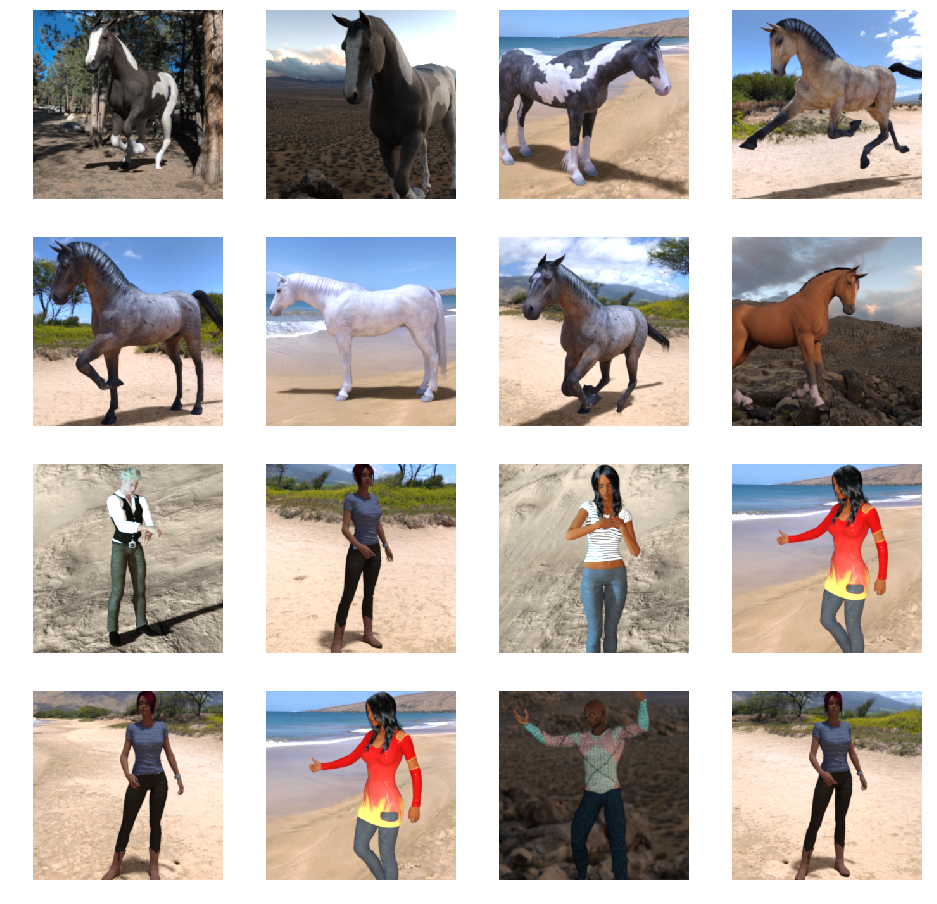

In [11]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

#loading first 8 images for horses and humans into arrays
pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname) 
                for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname) 
                for fname in train_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


In [0]:
import tensorflow as tf

In [13]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 64)        3

In [0]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        '/tmp/horse-or-human/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 150x150
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')
  

Found 1027 images belonging to 2 classes.


In [18]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=8,  
      epochs=15, 
      verbose =1 )

Epoch 1/15
8/8 [==============================] - 96s 12s/step - loss: 0.9893 - acc: 0.5625
Epoch 2/15
8/8 [==============================] - 72s 9s/step - loss: 0.7221 - acc: 0.6783
Epoch 3/15
8/8 [==============================] - 83s 10s/step - loss: 0.6727 - acc: 0.7063
Epoch 4/15
8/8 [==============================] - 93s 12s/step - loss: 0.3100 - acc: 0.8887
Epoch 5/15
8/8 [==============================] - 83s 10s/step - loss: 0.4301 - acc: 0.8543
Epoch 6/15
8/8 [==============================] - 83s 10s/step - loss: 0.1741 - acc: 0.9344
Epoch 7/15
8/8 [==============================] - 83s 10s/step - loss: 0.1730 - acc: 0.9355
Epoch 8/15
8/8 [==============================] - 83s 10s/step - loss: 0.0768 - acc: 0.9689
Epoch 9/15
8/8 [==============================] - 82s 10s/step - loss: 0.2828 - acc: 0.8910
Epoch 10/15
8/8 [==============================] - 77s 10s/step - loss: 0.3775 - acc: 0.9199
Epoch 11/15
8/8 [==============================] - 82s 10s/step - loss: 0.0668 -

Saving happy-horse-healthy-planet-_bcs8.jpg to happy-horse-healthy-planet-_bcs8 (5).jpg


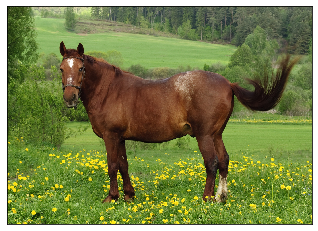

In [50]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

#to upload image of horse or human
uploaded = files.upload()

axis =plt.gca()
axis.axes.get_xaxis().set_visible(False)
axis.axes.get_yaxis().set_visible(False)

for fn in uploaded.keys():
  img = mpimg.imread(fn)
  plt.imshow(img)
plt.show()

 

In [51]:

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")

[0.]
happy-horse-healthy-planet-_bcs8.jpg is a horse
